
# Design Optimization
## EGR 557 Foldable Robotics
### Team 7

- Claudio Vignola

- Chien-Wen Pan

- Manoj Akkaraboina

- Dallas Wells



# **1. Performance Measurement**

_a. Explain, in words, how your team will evaluate the success of your robot’s design. This could be by measuring the forces produced by your design, the speed at which it walks, its thrust:weight ratio, the height it can jump, etc. Explain, in words, how you will measure performance in simulation - Chien can you help explaining?. How will you measure performance in experiments?_

  To evaluate the performance of our device we will be measuring the speed and the rate of elongation of the prototype. Other factors we are considering are the time of retraction and the force and velocity of the end effector. To measure the performance of the device we will be using the "Tracker" software to analyze the motion of the top bar and the velocity of the end effector closing mechanism. To determine the force of the end effector we will use a spring attached at the end of the end effector and measure the displacement between its original and final position.


_b. Are experimental vs. simulation metrics similar or vastly different? If different, how will you equate  with ?_

  Our prediction is that the metrics will be similar. If different we will review the simulation code and try to identify if the issue is in the scaling factor or in the geometry of the model.

_c. Do you have more than one performance metric you must use as for design goals? If so, either identify the most important one or explain how you will balance two competing criteria. For example, if you need a robot to jump high AND far, which is more important, or how do you establish a relationship between these two possibly competing goals?_

  We have 2 performance goals which is the velocity of the end effector to reach it's final position and the force of the end-effector to grasp. The two performance metrics are mutually exclusive, therefore, there isn't a most important one. Although considering the fish, the most important would be the velocity of the end effector.

_d. Explain, in math, the measurable performance metric(s) by which your team can estimate performance._

**1. Velocity of Movement**

|*Table 1. K constant Info*|
|-|

| Spring | K constant (N/m) |Intial Spring Lenght (cm) | Displacement (cm) |
|-----|-----|-----|-----|
|  Cardstock Single  |  15  |  0.0  |  10.0  |
|  Cardstock Double   |  30  |  0.0 |  10.0  | 

$$ {PE} = \frac {1}{2} {kx^2}  $$  

Add Spring Constant in $\frac {Newton}{meters}$

$$ {PE} =  \frac {1}{2} * (30 \frac {N}{m}) (x)^2 $$

Account displacement of the spring in $meters$

$$ {PE} =  \frac {1}{2} * (30 \frac {N}{m}) (0.1 m  )^2 = 0.15 J $$

$$ {KE} =  \frac {1}{2} mv^2 $$

Since $PE_i = KE_f$ means $KE = J$

$$ {KE} = \frac {1}{2} mv^2 $$
$$  0.15 J = \frac {1}{2} ( 0.02 kg)* v^2 $$
$$ v^2 = \frac {0.3 J}{0.02 kg}  $$
$$ \sqrt {v^2} = \sqrt {15   \frac {m^2} {s^2}}  $$
$$ v =  3.873  \frac {m}{s}$$

**2. End Effector Force**

|*Table 2. K constant Info*|
|-|

| Spring | K constant (N/m) |Intial Spring Lenght (cm) | Final Spring Lenght (cm) |
|-----|-----|-----|-----|
|  Rubber Band  |  45  |  10.0 (est.)  |  8.0 (est.) |


$$ {F} =  k(x_1-x_2) $$
$$ {F} =  45(0.10-0.08) = 0.9 N $$

The Required Force needs to be enough to grasp a strawberry which weights around $20g$

$$ {F_r} = mg$$
$$ {F_r} = 0.002*9.81 = 0.1962 N $$

Using the rubber band that is $2mm$ thick and $8mm$ long unstreched, our design should be able to grasp up to $91.7 grams$

$$ m= \frac {0.9}{9.81} = 0.09174 kg $$

_e. Write, in code, a function that will evaluate the performance of your current system (as simulated in System Dynamics II)._

This is the comparison between velocity in simulation and velocity in real life ( I amassuming a percentage %). Same for Force in ed effector


In [ ]:
def Velocity_of_Movement(k,x,m,Vactual):
    Vactual= 0.040 #the value measured in s
    PE=(1/2)*k*(x**2)
    V_square=(2*PE)/m
    v=V_square**0.5
    print(f'Velocity of Movement is {v}')
    Pv=v/Vactual*100
    print(f'Improved by {Pv}')   
    

In [ ]:
def end_effector_force(k,x1,x2,m):
    F=k*(x1-x2)
    Fr=m*9.8 # Force required to grasp a fruit of mass m.
    M=F/9.81 # Mass of the fruit that the end effector can grasp which is 0.0917kg in our case
    if m<=M:
        print('The end effector can grasp the fruit')
    else:
        print('The end effector cannot grasp the fruit')
    

## **2. Constraints:**

a) Brainstorm and describe your team’s design constraints. Constraints are aspects of your design that are “bounded” by some physical limit (eg, the size of robot you can cut on a given laser cutter, the range of motion of a typical foldable hinge joint)

Since the robotic arm comprises of a 4 bar mechanism, all the parts can be cut using most laser cutters. At this time, the material that we are using is cardboard and cardstock. So a CO2 laser cutter is an ideal laser cutter for our model. We will not be using any laser rastering for our current model. The range of motion of all the hinges of the 4 bar mechanism is 3.14 radians.

b) Explain, in words, how you will track violation of design constraints. For example, lets say your optimization routine suggests a design that cannot be made in a single sheet of paper.

 Will you parameterize your design space in such a way that 
p
=
[
−
∞
,
∞
]
 translates to a bounded design range?

penalize design performance when design parameters are outside of that range

explicitly bound your parameter space?

The violations of the design constraints will be tracked by reviewing the specifications of the laser cutter to make sure that it is compliant with the material that we use. For any other design constraints we will explicitly bound the parameter space by utilizing the spicy.optimize.minimize function. 

# **3. Execute the full optimization routine, using the code above, that**

- permits you to parameterize your design space in one or more variable

- generates a scalar performance metric that implements your goal as stated above.

- selects an optimization approach based on your decisions above. This may be a global search or use one of the many optimization routines available in Python.

- bounds or penalizes designs outside of a permissable range

- Run your optimization and determine the optimal parameter value(s)

In this assignment, we try to find the optimal locations to attach the spring to get the fastest shooting velocity of the device. In the following formulation, we link the system kinematic/dynamic to distances (design parameters)

![Set Up Image](https://drive.google.com/uc?id=1awEsaHdhx649SwaMeocsg8PffsS3W38S)

*Figure 1. Formulation of the design parameters to the system*



The performance matrix is the velocity of our end-effector, in our case, vBtip. We want it to be as fast as possible; thereofre, in the simulation we define the perforamnce matrix as 1/vBtip and try to minimize this term.

Then, we use global search (0 - 0.12 m for d1 and 0 - 0.04 m for d2) in those design parameters to find the optimal performance.


In our simulation, we define the initial spring rotational angles follow by the formulation derived from the previous section and iterate through the whole motion.


![Set Up Image](https://drive.google.com/uc?id=1_HVsv7tGk3rmDlruD6hQ4Mt6lhMr0wTl)

With the parameterized design space, we follow the example code from lecture to feed those two design parameters (d1 and d2) into function and search globally for the optimal result (vBtip).

An initila guess of [0.05,0.01] (m) is used.

![Set Up Image](https://drive.google.com/uc?id=1oCipBRXXVDevVvbTogmri7B6LWPGJlS_)

In [ ]:
# RUN PIP INSTALL CODE BLOCK

# Install standard packages...
!pip install meshio pygmsh ezdxf pandoc-fignos pandoc-eqnos pypdf4 service_identity ftd2xx pygithub twine paho-mqtt
!pip install ntplib pygame pysftp pyserial

# Install foldable-robotics-specific packages.
!pip install pypoly2tri idealab_tools foldable_robotics pynamics

     |████████████████████████████████| 163kB 8.6MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 2.2MB 31.1MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 163kB 38.0MB/s 
     |████████████████████████████████| 296kB 33.5MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
     |████████████████████████████████| 3.2MB 45.2MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
  Created wheel for pypdf4: filename=PyPDF4-1.27.0-cp37-none-any.whl size=61249 sha256=586cf4e1957c44997a95b3c1a20288c324e962d0698bccf86c104e84b54d6e14
  Stored in directory: /root/.cache/pip/wheels/eb/4f/15/c64d533cb496fd874f56045fe30e8cc0ac59f99ecdd718040d
  Created wheel for paho-mqtt: filename=paho_mqtt-1.5.1-cp37-none-any.whl size=61546 sha256=6c837a45488e4e3c096e9c12df2d337371b9a8daa56f352aa132c8d09d44eba9
  Stored in directory: /root/.cach

2021-04-24 22:18:36,401 - pynamics.system - INFO - getting dynamic equations
2021-04-24 22:18:37,003 - pynamics.system - INFO - solving a = f/m and creating function
2021-04-24 22:18:37,015 - pynamics.system - INFO - substituting constrained in Ma-f.
2021-04-24 22:18:37,772 - pynamics.system - INFO - done solving a = f/m and creating function
2021-04-24 22:18:37,775 - pynamics.system - INFO - calculating function for lambdas
2021-04-24 22:18:37,822 - pynamics.integration - INFO - beginning integration
2021-04-24 22:18:37,824 - pynamics.system - INFO - integration at time 0000.00
2021-04-24 22:18:38,268 - pynamics.integration - INFO - finished integration
2021-04-24 22:18:38,351 - pynamics.output - INFO - calculating outputs
2021-04-24 22:18:38,420 - pynamics.output - INFO - done calculating outputs
2021-04-24 22:18:38,528 - pynamics.integration - INFO - beginning integration
2021-04-24 22:18:38,717 - pynamics.system - INFO - integration at time 0008.77
2021-04-24 22:18:38,880 - pynamic

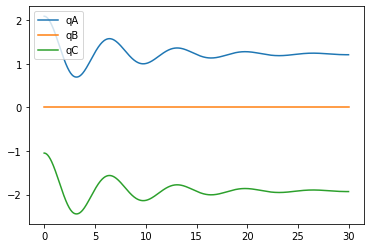

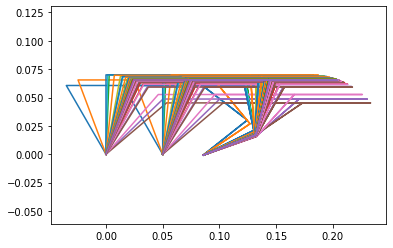

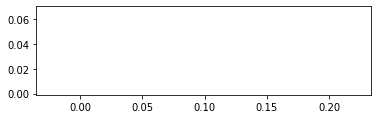

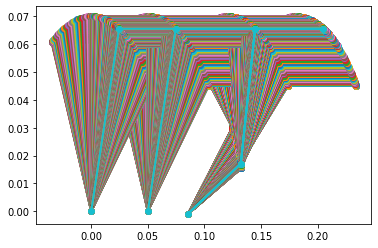

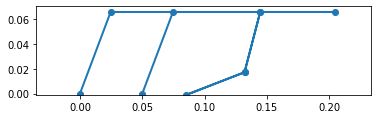

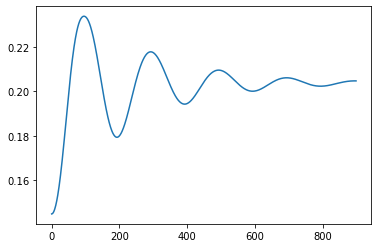

In [ ]:
# import packages
import pynamics
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle, PseudoParticle
import pynamics.integration
import sympy
import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi
#from pynamics.constraint import Constraint
import scipy.optimize


# import cma

import matplotlib.pyplot as plt
plt.ion()
# from math import pi, sin, cos
system = System()
pynamics.set_system(__name__,system)


global_q = True
use_constraints = False

# Create Pynamic system
system = System()
pynamics.set_system(__name__,system)

# Define constants and variables

g = Constant(9.81,'g',system)

# Add joint stiffness.
b = Constant(1e0,'b',system)
bS = Constant(0.6,'bs',system)
k1 = Constant(1e1,'k1',system)
k2 = Constant(1e0,'k2',system)
#b_cboard = Constant (0e0, 'b_cboard', system)
#k_cboard = Constant (0e0, 'k_cboard', system)
#b_cstock = Constant (0e0, 'b_cstock', system)
#k_cstock = Constant (0e0, 'k_cstock', system)
#b_balsa = Constant (0e0, 'b_balsa', system)
#k_balsa = Constant (0e0, 'k_balsa', system)

preload1 = Constant(0*pi/180,'preload1',system)
preload2 = Constant(0*pi/180,'preload2',system)
preload3 = Constant(0*pi/180,'preload3',system)
preloadS1 = Constant(-90*pi/180,'preloadS1',system)
preloadS2 = Constant(0*pi/180,'preloadS2',system)

# Integration tolerance
tol = 1e-9

# Time
tinitial = 0
tfinal = 30
fps = 30
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]

# Differential state variables
qA,qA_d,qA_dd = Differentiable('qA',system)
qB,qB_d,qB_dd = Differentiable('qB',system)
qC,qC_d,qC_dd = Differentiable('qC',system)
qS1,qS1_d,qS1_dd = Differentiable('qS1',system)
qS2,qS2_d,qS2_dd = Differentiable('qS2',system)

# xBtip,xBtip_d,xBtip_dd = Differentiable('x_Btip',system)


# Define constants and variables
lA = Constant(0.07,'lA',system)
lB = Constant(0.18,'lB',system)
lC = Constant(0.07,'lC',system)
lD = Constant(0.05,'lD',system)

lSpring = Constant(0.05,'lS', system) # upper part of the spring in pynamic model

d1 = Constant(0.07,'d1', system) # Distance from pBC to spring in upper linkage
d2 = Constant(0.04,'d2', system) # Distance from pCD to spring in base

mA = Constant(0.0006405,'mA',system)
mB = Constant(0.0019638,'mB',system)
mC = Constant(0.0006405,'mC',system)
# mM = Constant(0.001254675,'mM',system)
mS = Constant(0.0011616,'mS',system)

# import math
# qS1_ini = sympy.atan((60.6 - lSpring*sympy.sin(qS2))/(-lSpring*sympy.cos(qS2) + d2 - d1))
# qS2_ini = sympy.atan((-60.6 + lSpring*sympy.sin(qS1))/(lSpring*sympy.cos(qS1) + d1 - d2))

# qS1_ini = sympy.lambdify(system.constants, qS1_ini)
# qS1 = qS1_ini(*system.constant_values.T)
# qS2_ini = sympy.lambdify(system.constants, qS2_ini)

##############################################################################
###### states = [qA, qB, qC, qS1, qS2, qA_d, qB_d, qC_d, qS1_d, qS2_d]########
##############################################################################

# Initial values
initialvalues = {}
initialvalues[qA]=120*pi/180
initialvalues[qA_d]=0*pi/180
initialvalues[qB]=0*pi/180
initialvalues[qB_d]=0*pi/180
initialvalues[qC]=-60*pi/180
initialvalues[qC_d]=0*pi/180
initialvalues[qS1]=-37.6*pi/180
initialvalues[qS1_d]=0*pi/180
initialvalues[qS2]=-141.6*pi/180
initialvalues[qS2_d]=0*pi/180
# initialvalues[qS1]=-60*pi/180
# initialvalues[qS1_d]=0*pi/180
# initialvalues[qS2]=-160*pi/180
# initialvalues[qS2_d]=0*pi/180

# initialvalues[xBtip] = 
# initialvalues[xBtip_d]=0*pi/180


statevariables = system.get_state_variables()
ini = [initialvalues[item] for item in statevariables]

# Define frames and frames rotations
N = Frame('N')
A = Frame('A')
B = Frame('B')
C = Frame('C')
# M = Frame('M')

S1 = Frame('S1')
S2 = Frame('S2')

system.set_newtonian(N)

if not global_q:
    A.rotate_fixed_axis_directed(N,[0,0,1],qA,system)
    B.rotate_fixed_axis_directed(A,[0,0,1],qB,system)
    C.rotate_fixed_axis_directed(B,[0,0,1],qC,system)
    S1.rotate_fixed_axis_directed(B,[0,0,1],qS1,system)
    S2.rotate_fixed_axis_directed(S1,[0,0,1],qS2,system)
else:
    A.rotate_fixed_axis_directed(N,[0,0,1],qA,system)
    B.rotate_fixed_axis_directed(N,[0,0,1],qB,system)
    C.rotate_fixed_axis_directed(N,[0,0,1],qC,system)
    S1.rotate_fixed_axis_directed(N,[0,0,1],qS1,system)
    S2.rotate_fixed_axis_directed(N,[0,0,1],qS2,system)


# Define kinematics
pNA = 0*N.x + 0*N.y
pAB = pNA + lA*A.x
pBtip = pAB + lB*B.x
pBC = pAB + lD*B.x
pCD = pBC + lC*C.x

vBtip = pBtip.time_derivative()

pSpring1 = pBC + d1*B.x
pSpring1tip = pSpring1 + lSpring*S1.x
pSpring2tip = pSpring1tip + lSpring*S2.x

pSpring2end = pCD + d2*N.x

points = [pNA,pAB,pBtip,pSpring1, pSpring1tip, pSpring2tip, pSpring1tip, pSpring1, pBC,pCD]

# Add inertia. In the following code, we use point mass before we have the more realistic values of inertia. Therefore, all inertial values are 1 for now.
Ixx_A = Constant(4.5,'Ixx_A',system)
Iyy_A = Constant(1.5,'Iyy_A',system)
Izz_A = Constant(6,'Izz_A',system)
Ixx_B = Constant(176.1,'Ixx_B',system)
Iyy_B = Constant(183.6,'Iyy_B',system)
Izz_B = Constant(7.7,'Izz_B',system)
Ixx_C = Constant(4.5,'Ixx_C',system)
Iyy_C = Constant(1.5,'Iyy_C',system)
Izz_C = Constant(6,'Izz_C',system)

Ixx_S = Constant(3,'Ixx_S',system)
Iyy_S = Constant(1,'Iyy_S',system)
Izz_S = Constant(3,'Izz_S',system)

# Center of mass
pAcm = pNA+lA/2*A.x
pBcm = pAB+lB/2*B.x
pCcm = pBC+lC/2*C.x

pS1cm = pSpring1 + lSpring/2*S1.x
pS2cm = pSpring1tip + d2/2*S2.x

# Angular velocity
wNA = N.getw_(A)
wAB = A.getw_(B)
wBC = B.getw_(C)
wBS1 = B.getw_(S1)
wS12 = S1.getw_(S2)

# Define body
IA = Dyadic.build(A,Ixx_A,Iyy_A,Izz_A)
IB = Dyadic.build(B,Ixx_B,Iyy_B,Izz_B)
IC = Dyadic.build(C,Ixx_C,Iyy_C,Izz_C)

IS1 = Dyadic.build(S1,Ixx_S,Iyy_S,Izz_S)
IS2 = Dyadic.build(S2,Ixx_S,Iyy_S,Izz_S)


# BodyA = Particle(pAcm,mA,'ParticleA',system)
# BodyB = Particle(pBcm,mB,'ParticleB',system)
# BodyC = Particle(pCcm,mC,'ParticleC',system)
BodyA = Body('BodyA',A,pAcm,mA,IA,system)
BodyB = Body('BodyB',B,pBcm,mB,IB,system)
BodyC = Body('BodyC',C,pCcm,mC,IC,system)

BodyS1 = Body('BodyS1',S1,pS1cm,mS,IS1,system)
BodyS2 = Body('BodyS2',S2,pS2cm,mS,IS2,system)


system.addforce(-b*wNA,wNA)
system.addforce(-b*wAB,wAB)
system.addforce(-b*wBC,wBC)
system.addforce(-bS*wBS1,wBS1)
system.addforce(-bS*wS12,wS12)

# Spring force
if not global_q:
    system.add_spring_force1(k1,(qS1-preloadS1)*S1.z,wBS1)
    system.add_spring_force1(k2,(qS2-preloadS2)*S2.z,wS12)
    # system.add_spring_force1(k,(qA-preload1)*N.z,wNA)
    #system.add_spring_force1(k,(qB-preload2)*A.z,wAB)
    #system.add_spring_force1(k,(qC-preload3)*B.z,wBC)
else:
    system.add_spring_force1(k1,(qS1-preloadS1)*N.z,wBS1)
    system.add_spring_force1(k2,(qS2-preloadS2)*N.z,wS12)
    # system.add_spring_force1(k,(qA-preload1)*N.z,wNA)
    #system.add_spring_force1(k,(qB-qA-preload2)*N.z,wAB)
    #system.add_spring_force1(k,(qC-qB-preload3)*N.z,wBC)
    
# Gravity force
system.addforcegravity(-g*N.y)


# Define constraints

eq = []
eq.append(pCD.dot(N.x))
eq.append(pCD.dot(N.y))
eq.append(pSpring2tip.dot(N.x))
eq.append(pSpring2tip.dot(N.y))

eq_d=[(system.derivative(item)) for item in eq]
eq_dd=[(system.derivative(item)) for item in eq_d]


f,ma = system.getdynamics()

func1,lambda1 = system.state_space_post_invert(f,ma,eq_dd,return_lambda = True)

states = pynamics.integration.integrate(func1,ini,t,rtol=tol,atol=tol, args=({'constants':system.constant_values},))

#%% Plot

# # Plot --- output
plt.figure()
SlingJaw = plt.plot(t,states[:,:3])
plt.legend(SlingJaw,['qA','qB','qC'])

# Motion
points = [pNA,pAB,pBtip,pSpring1, pSpring1tip, pSpring2tip, pSpring1tip, pSpring1, pBC,pCD]
# points = [pNA,pAB,pBtip,pBC, pCD]
points_output = PointsOutput(points,system)
y = points_output.calc(states)
points_output.plot_time(20)

points_output.animate(fps = 30,lw=2)



# Run performance with difference "spring locations""
def run(args):
    Spring_d1 = args[0]
    Spring_d2 = args[1]
    constants = system.constant_values.copy()
    constants[d1] = Spring_d1
    constants[d2] = Spring_d2
    states = pynamics.integration.integrate_odeint(func1,ini,t, args=({'constants':constants},))        
    return states


# def measure_perf(args):
#     print('d1: ',args[0])
#     # print('d2: ',args[1])
#     if args[0]>0.12:
#         return 1000
#     if args[0]<=0:
#         return 1000
#     # if args[1]>0.04:
#     #     return 1000
#     # if args[1]<=0:
#     #     return 1000
#     try:
#         states = run(args)
#         perf = 1/states[-1,0]
#         return perf
#     except scipy.linalg.LinAlgError:
#         return 1000

# sol = scipy.optimize.minimize(measure_perf,[0.05],tol=1e-3)

# def perf(args):
#     states = run(args)
#     perf = 1/states[-1,0]
#     return perf


# yy = []    
# xx = numpy.r_[0.01:0.12:12j]
# for ii in xx:
#     yy.append(measure_perf([ii]))
    
# yy = numpy.array(yy)
# plt.plot(xx,yy)

states = run([0.07, 0.04])
# output = Output(ang,system)
# output.calc(states)
# output.plot_time()

po = PointsOutput(points,system)
y=po.calc(states)
#po.plot_time()
#y = y.reshape((-1,2,2))
plt.figure()
for item in y:
    plt.plot(*(item.T),lw=2,marker='o')
#
po.animate(fps = 30, movie_name='glider.mp4',lw=2,marker='o')


# To plot for each of the set up.
# 1. experiment, 2. data, 3. try to match with simulation
# plt.figure()
# plt.plot(0.07*states[:,5])

xTraj = 0.07*numpy.cos(states[:,0]) + 0.18
# xMax = numpy.amax(xTraj)
xFinal = xTraj[-1]
# numpy.amax(abs(states[:,5]))

plt.figure()
plt.plot(xTraj)

numpy.savetxt("xTraj.csv", numpy.c_[xTraj], delimiter = ",")


# 4. Generate a figure that shows that your parameter value is at or very near the optimal value.

Since the initial angles of the spring with respect to the four bar mechanism are coupled together, we'd always have symbolic term in the formulation. Therefore, we simulate the dynamic response of the system in different configurations one by one and record the settled x position. After we got all 48 configurations, we plot the result in the following heatmap.

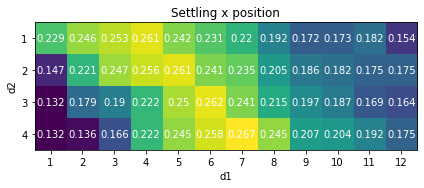

In [ ]:
#%%

# Plot heatmap

d1 = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
d2 = ["1", "2", "3", "4"]

xPos = numpy.array([[2.29E-01, 1.47E-01, 1.32E-01, 1.32E-01],
                    [2.46E-01, 2.21E-01, 1.79E-01, 1.36E-01],
                    [2.53E-01, 2.47E-01, 1.90E-01, 1.66E-01],
                    [2.61E-01, 2.56E-01, 2.22E-01, 2.22E-01],
                    [2.42E-01, 2.61E-01, 2.50E-01, 2.45E-01],
                    [2.31E-01, 2.41E-01, 2.62E-01, 2.58E-01],
                    [2.20E-01, 2.35E-01, 2.41E-01, 2.67E-01],
                    [1.92E-01, 2.05E-01, 2.15E-01, 2.45E-01],
                    [1.72E-01, 1.86E-01, 1.97E-01, 2.07E-01],
                    [1.73E-01, 1.82E-01, 1.87E-01, 2.04E-01],
                    [1.82E-01, 1.75E-01, 1.69E-01, 1.92E-01],
                    [1.54E-01, 1.75E-01, 1.64E-01, 1.75E-01]])


fig, ax = plt.subplots()
im = ax.imshow(xPos.T)

# We want to show all ticks...
ax.set_xticks(numpy.arange(len(d1)))
ax.set_yticks(numpy.arange(len(d2)))
# ... and label them with the respective list entries
ax.set_xticklabels(d1)
ax.set_yticklabels(d2)

ax.set_xlabel('d1')
ax.set_ylabel('d2')

# Loop over data dimensions and create text annotations.
for i in range(len(d2)):
    for j in range(len(d1)):
        text = ax.text(j, i, xPos.T[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Settling x position")
fig.tight_layout()
plt.show()